## Importación de librerías

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
# Datos en bruto
data = datasets.load_iris()

In [3]:
# Verifico la información contenida en el dataset
print('Información en el dataset:')
print(data.keys())

Información en el dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# Verifico las características del dataset
print('Características del dataset:')
print(data.DESCR)

Características del dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== =

### Creación del dataset

In [5]:
df_iris = pd.DataFrame(data=data.data, columns=data.feature_names)
df_iris['target'] = data.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(df_iris.shape)

Cantidad de datos:
(150, 5)


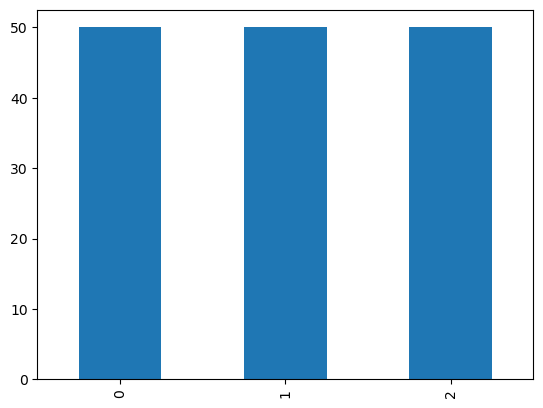

In [7]:
# Verifico el número de registros por clase
freq = df_iris['target'].value_counts()
freq.plot(kind='bar')
plt.show()

## Exploración de datos

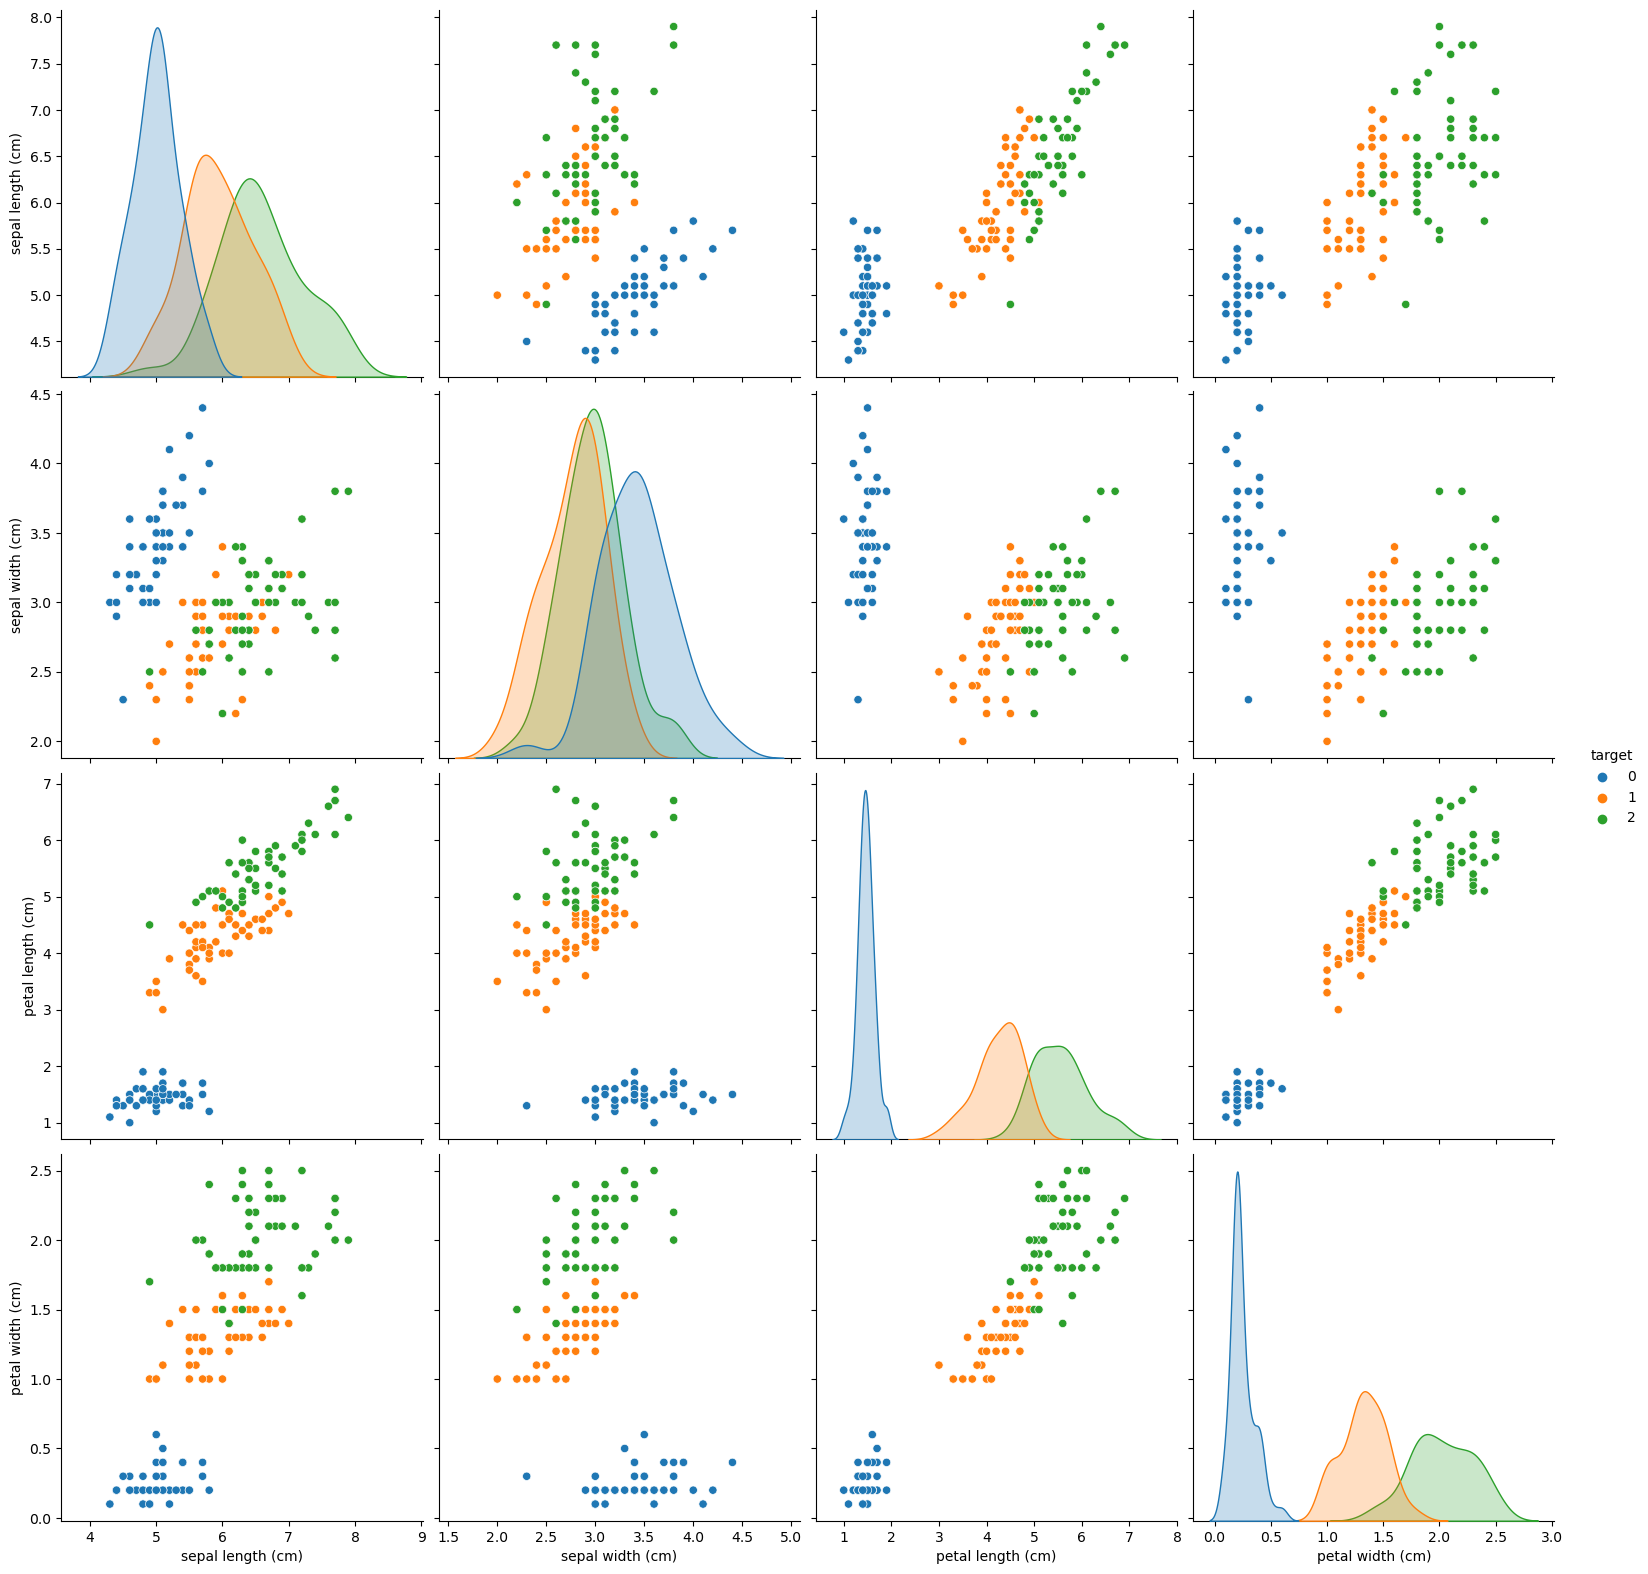

In [8]:
# Otros tipos de gráficos
df = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']]
sns.pairplot(df, hue='target', height=4, palette='tab10')
plt.show()

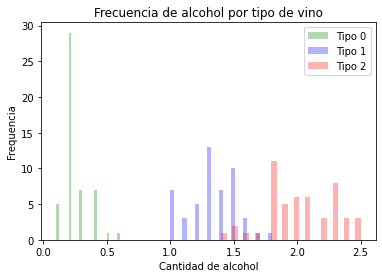

In [19]:
# Histograma de la variable alcohol
x1 = df_iris.loc[df_iris.target==0, 'petal width (cm)']
x2 = df_iris.loc[df_iris.target==1, 'petal width (cm)']
x3 = df_iris.loc[df_iris.target==2, 'petal width (cm)']

# Argumentos para los colores
kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de alcohol por tipo de vino', xlabel='Cantidad de alcohol', ylabel='Frequencia')

plt.legend();

## Preprocesamiento de datos

### Selección de datos

In [11]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = df_iris[['petal width (cm)']]

In [12]:
# Defino los datos correspondientes a las etiquetas
y = df_iris['target']

### División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split.
Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [13]:
# Dividimos los datos de "entrenamiento" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Creación del modelo de Clasificación

In [14]:
# Selección de k (número de vecinos más cercanos a tener en cuenta)
k = 3

# Creación del modelo
knn_model = KNeighborsClassifier(n_neighbors=k)

# Ajuste del modelo al conjunto de datos de entrenamiento
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicción del conjunto de datos de prueba

In [15]:
# Predicción del conjunto de datos de prueba
y_pred = knn_model.predict(X_test)

## Validación de resultados

In [16]:
df_resultados =  pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_resultados['Valor Real'] = y_test
df_resultados['Valor Predicho'] = y_pred
df_resultados.head()

,Valor Real,Valor Predicho
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


### Matriz de confusión

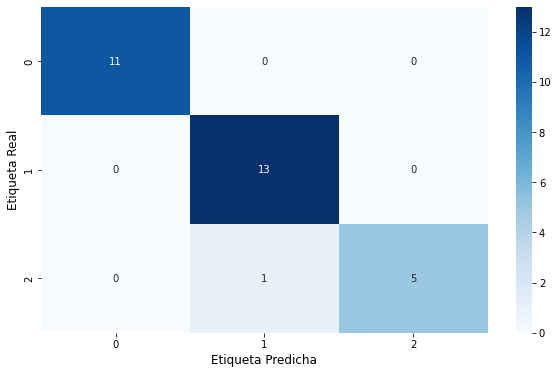

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

## Métricas

Como vimos en la teoría:
- Precisión: Permite medir la calidad del modelo. Indica cuántos de los registros predichos como una clase pertenecen a esa clase.
- Recall: Permite medir la cantidad de registros que el modelo es capaz de identificar.
- F1-score: Combina las medidas de precisión y recall.

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



Además:
- Macro avg: Calcula la media de los valores de cada clase.
- Weighted avg: Calcula la media de los valores de cada clase teniendo en cuenta el número de registros de cada clase (support)